## Combine the multiple files into one big CSV since we could not load a large file to GitHub. 

In [ ]:
! ./combine.sh

### Read in a set of data and examine it

In [1]:
import pandas as pd
df = pd.read_csv('CreditCardFraud.csv')


In [2]:
print(df.shape, df.columns)
train_size = .3
test_size = .1

display(df.head())
print(df.isFraud.value_counts())
print(df.type.value_counts())


(6362620, 11) Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

0    6354407
1       8213
Name: isFraud, dtype: int64
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


### Keep the columns we want and change the type to code numbers instead

In [3]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']
df = df[columns]
df.type = pd.Categorical(df.type).codes
print(df.shape, df.columns)
display(df.head())


(6362620, 8) Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')


type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  isFraud  
0             0.0               0        0  
1             0.0               0        0  
2             0.0               0        1  
3             0.0               0        1  
4             0.0               0        0

### Prepare train & test sets with desired columns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
dfNB = df
trainNB_X, testNB_X, trainNB_Y, testNB_Y = train_test_split(dfNB[dfNB.columns[:-1]], dfNB.isFraud, \
                                        train_size = train_size, test_size = test_size, random_state = 1)
print(testNB_Y.value_counts())
print(trainNB_Y.value_counts()/trainNB_Y.count())
print(testNB_Y.value_counts()/testNB_Y.count())
display(trainNB_X.head(10))

0    635443
1       819
Name: isFraud, dtype: int64
0    0.998711
1    0.001289
Name: isFraud, dtype: float64
0    0.998713
1    0.001287
Name: isFraud, dtype: float64


type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2905745     3   37893.89      459458.00       421564.11            0.00   
1736803     3    6845.16       21681.00        14835.84            0.00   
5280454     1  228634.04       11468.00            0.00     16189748.80   
2661986     1  119743.66           0.00            0.00       167874.79   
5558756     0  247921.74     8331614.08      8579535.82       306347.82   
395499      0   34281.10     8133480.89      8167761.99      1515351.48   
4164423     1   49158.31           0.00            0.00        97500.27   
2956930     3    7481.25         634.00            0.00            0.00   
5837600     3    9018.38      283780.19       274761.81            0.00   
1402926     1   73857.88           0.00            0.00       169013.85   

         newbalanceDest  isFlaggedFraud  
2905745            0.00               0  
1736803            0.00               0  
5280454     16418382.84               0  
2661986       287618.45               0  
5558756        58426.08               0  
395499       1481070.38               0  
4164423       146658.58               0  
2956930            0.00               0  
5837600            0.00               0  
1402926       253218.35               0

## Create a Naive Bayes model

In [5]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(trainNB_X, trainNB_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Examine the results of Naive Bayes

In [6]:
def evaluate_predictions(test, pred, show_percent = True):
    from sklearn.metrics import confusion_matrix
    length = len(test)
    print(f'Test length = {length}')
    print('\nTest Values')
    print(test.value_counts())
    print('\nPredicted Values')
    #print(pred, type(pred))
    print(pd.value_counts(pred))
    print('\n TP FP\n FN TN')
    cm = confusion_matrix(test, pred)
    print(cm)

    if show_percent:
        import numpy as np
        print('\n PC FP\n FN PW')
        print(np.ndarray(shape = (2,2), buffer = np.array([100 *(cm[0][0] + cm[1][1])/length, \
           100 * cm[0][1]/length, 100 * cm[1][0]/length, 100 * (cm[1][0] + cm[0][1])/length])))

          

predNB_Y = modelNB.predict(testNB_X)
evaluate_predictions(testNB_Y, predNB_Y)


Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    629950
1      6312
dtype: int64

 TP FP
 FN TN
[[629249   6194]
 [   701    118]]

 PC FP
 FN PW
[[98.91632692  0.97349834]
 [ 0.11017474  1.08367308]]


## Save a trained model

In [ ]:
from joblib import dump, load
dump(modelNB, 'modelNB.joblib') 


## Load a saved model

In [ ]:
modelNB2 = load('modelNB.joblib')
predNB_Y = modelNB2.predict(testNB_X)

evaluate_predictions(testNB_Y, predNB_Y)


## LAB 1: ## 

### Do a similar set of steps as Naive Bayes but this time use a Decision Tree algorithm

#### 1. Import the correct model to do DecisionTree
#### 2. Create an instance of the model
#### 3.	Train the model using the training sets
#### 4. Explore the results

<br>
<details><summary>Click for <b>hint</b></summary>
<p>
<b>dir</b> sklearn.tree package to find the right name of the model class
<br>
<b>help</b> the class name to explore the parameters. We can pass none in this case.
<br>
<b>fit</b> the empty model to train it
<br>
Use the helper function to analyze the results. Which model did a better job?
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
from sklearn.tree import DecisionTreeClassifier
dfDT = df

trainDT_X, testDT_X, trainDT_Y, testDT_Y = trainNB_X, testNB_X, trainNB_Y, testNB_Y

modelDT = DecisionTreeClassifier()
modelDT.fit(trainDT_X, trainDT_Y)
predDT_Y = modelDT.predict(testDT_X)
evaluate_predictions(testDT_Y, predDT_Y)

```
</p>
</details>

## Train the Decision Tree model

In [ ]:
from sklearn.tree import ???

# copy the same datasets to the DT names just to keep a copy for the future
dfDT, trainDT_X, testDT_X, trainDT_Y, testDT_Y = df, trainNB_X, testNB_X, trainNB_Y, testNB_Y



## Decision Trees have another option to let you see what are the most important features influencing the decisions. The following helper function makes it easier to view

In [ ]:
def important_features(model, columns):
    return pd.DataFrame(model.feature_importances_, columns=['Importance'], index = columns).sort_values(['Importance'], ascending = False)
 
print(important_features(modelDT, trainDT_X.columns))


## Prepare the data
### Logistic Regression requires categorical data be dummy encoded

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp

def dummy_code(data, columns, drop_first = True):
    for c in columns:
        dummies = pd.get_dummies(data[c], prefix = c, drop_first = drop_first)
        i = list(data.columns).index(c)
        data = pd.concat([data.iloc[:,:i], dummies, data.iloc[:,i+1:]], axis = 1)
    return data

dfLR = dummy_code(df, ['type'], drop_first = True)
trainLR_X, testLR_X, trainLR_Y, testLR_Y = train_test_split(dfLR.iloc[:,dfLR.columns != 'isFraud'], dfLR.isFraud, train_size = train_size, test_size = test_size, random_state = 1)

print(testLR_X.columns)
display(testLR_X.head())


Index(['type_1', 'type_2', 'type_3', 'type_4', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')


type_1  type_2  type_3  type_4     amount  oldbalanceOrg  \
6322570       0       0       0       0   23557.12        8059.00   
3621196       0       0       1       0    6236.13           0.00   
1226256       0       0       1       0   33981.87       18745.72   
2803274       1       0       0       0  263006.42       20072.00   
3201247       1       0       0       0  152013.74       20765.00   

         newbalanceOrig  oldbalanceDest  newbalanceDest  isFlaggedFraud  
6322570        31616.12       169508.66       145951.53               0  
3621196            0.00            0.00            0.00               0  
1226256            0.00            0.00            0.00               0  
2803274            0.00       390253.56       653259.98               0  
3201247            0.00       252719.19       404732.93               0

## Create a Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='auto', solver='lbfgs')
modelLR.fit(trainLR_X, trainLR_Y)
print(modelLR.coef_)

[[-2.50015885e-08 -2.47027152e-09 -3.46986719e-07 -1.01513317e-09
  -7.84424352e-04  7.89335688e-04 -8.72767319e-04  1.61294655e-06
  -3.37197922e-06  1.61130009e-11]]


## Examine the results of Logistic Regression

In [13]:
%matplotlib inline
import numpy as np
predLR_Y = modelLR.predict(testLR_X)

score = modelLR.score(testLR_X, testLR_Y)
mse = np.mean((predLR_Y - testLR_Y)**2)
print(score, mse, '\n')

evaluate_predictions(testLR_Y, predLR_Y)


0.9974915993725855 0.002508400627414493 

Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    634223
1      2039
dtype: int64

 TP FP
 FN TN
[[634035   1408]
 [   188    631]]

 PC FP
 FN PW
[[9.97491599e+01 2.21292486e-01]
 [2.95475763e-02 2.50840063e-01]]


## Logistic regression has another option called predict_proba() that can be used to set a custom threshold rather than the default.

array([[1.00000000e+00, 4.55741514e-18],
       [9.92547852e-01, 7.45214764e-03],
       [9.99992929e-01, 7.07071912e-06],
       ...,
       [9.98552352e-01, 1.44764768e-03],
       [9.99652270e-01, 3.47730292e-04],
       [9.99999784e-01, 2.16187600e-07]])

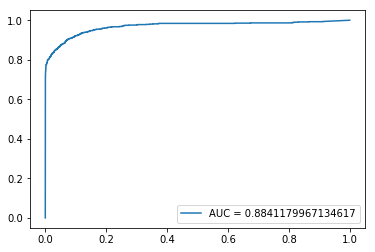

In [14]:
predLR_Y1 = modelLR.predict_proba(testLR_X)
display(predLR_Y1)

from sklearn.metrics import roc_auc_score, roc_curve
roc = roc_auc_score(testLR_Y, predLR_Y)
fpr, tpr, x = roc_curve(testLR_Y, predLR_Y1[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc))
plt.legend(loc=4)
plt.show()


## Try Logistic Regression with different probability thresholds to change ratio of false negatives and positives

In [15]:
predLR_Y = modelLR.predict_proba(testLR_X)
print(predLR_Y[:10])
print('Score', modelLR.score(testLR_X, testLR_Y))

for threshold in range(10, 91, 10):
    predLR_Y1 = np.where(predLR_Y[:,0] >= threshold/100, 0, 1)
    mse = np.mean((predLR_Y1 - testLR_Y)**2)
    print ('\nTHRESHOLD', threshold, 'MSE', mse)

    evaluate_predictions(testLR_Y, predLR_Y1, show_percent = False)



[[1.00000000e+000 4.55741514e-018]
 [9.92547852e-001 7.45214764e-003]
 [9.99992929e-001 7.07071912e-006]
 [1.00000000e+000 3.96986341e-084]
 [1.00000000e+000 8.24050302e-046]
 [9.03717842e-001 9.62821576e-002]
 [1.00000000e+000 5.48779516e-047]
 [1.00000000e+000 3.96251854e-179]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.76537176e-249]]
Score 0.9974915993725855

THRESHOLD 10 MSE 0.0008644237751115107
Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    635993
1       269
dtype: int64

 TP FP
 FN TN
[[635443      0]
 [   550    269]]

THRESHOLD 20 MSE 0.0007779813976003596
Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    635936
1       326
dtype: int64

 TP FP
 FN TN
[[635442      1]
 [   494    325]]

THRESHOLD 30 MSE 0.0006899673404980967
Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    635878
1     

## Prepare the data for a Neural Network
### This time you should not drop the first column when dummy encoding. Additionally, data works better if it is rescaled.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
# rescale the data
dfNN = dummy_code(df, ['type'], drop_first = False)
print(dfNN.columns)
dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] /= dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()
trainNN_X, testNN_X, trainNN_Y, testNN_Y = train_test_split(dfNN.iloc[:,dfNN.columns != 'isFraud'], dfNN.isFraud, train_size = train_size, test_size = test_size, random_state = 1)



Index(['type_0', 'type_1', 'type_2', 'type_3', 'type_4', 'amount',
       'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'isFraud'],
      dtype='object')


## Create a Neural Network model
This is running very slow here so let's not do it

In [17]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes = (5, 3, 2), activation = 'logistic')
modelNN.fit(trainNN_X, trainNN_Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Examine the results of Neural Network predictions

In [18]:
predNN_Y = modelNN.predict(testNN_X)

evaluate_predictions(testNN_Y, predNN_Y, show_percent = False)



Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    635879
1       383
dtype: int64

 TP FP
 FN TN
[[635386     57]
 [   493    326]]


## Create a SVM model

In [19]:
from sklearn import svm
train_size = .03
test_size = .01
dfSVM = dfNN
trainSVM_X, testSVM_X, trainSVM_Y, testSVM_Y = train_test_split(dfSVM.iloc[:,dfSVM.columns != 'isFraud'], dfSVM.isFraud, train_size = train_size, test_size = test_size)

def do_SVM(kernel, gamma):
    print ("\nKernel:", kernel, "Gamma:", gamma)
    modelSVM = svm.SVC(gamma = gamma,  kernel = kernel)
    modelSVM.fit(trainSVM_X, trainSVM_Y)
    print (modelSVM.score(testSVM_X, testSVM_Y))

    predSVM_Y = modelSVM.predict(testSVM_X)
    evaluate_predictions(testSVM_Y, predSVM_Y, show_percent = False)
    
do_SVM('linear', gamma='auto')

for kernel in ['rbf', 'poly', 'sigmoid']:
    for gamma in ['auto', 10, 100]:
        if not (kernel == 'poly' and gamma == 100):
           do_SVM(kernel, gamma)




Kernel: linear Gamma: auto
0.9988684049224386
Test length = 63627

Test Values
0    63554
1       73
Name: isFraud, dtype: int64

Predicted Values
0    63626
1        1
dtype: int64

 TP FP
 FN TN
[[63554     0]
 [   72     1]]

Kernel: rbf Gamma: auto
0.9988526883241391
Test length = 63627

Test Values
0    63554
1       73
Name: isFraud, dtype: int64

Predicted Values
0    63627
dtype: int64

 TP FP
 FN TN
[[63554     0]
 [   73     0]]

Kernel: rbf Gamma: 10
0.9989627045122353
Test length = 63627

Test Values
0    63554
1       73
Name: isFraud, dtype: int64

Predicted Values
0    63620
1        7
dtype: int64

 TP FP
 FN TN
[[63554     0]
 [   66     7]]

Kernel: rbf Gamma: 100
0.9991041538969305
Test length = 63627

Test Values
0    63554
1       73
Name: isFraud, dtype: int64

Predicted Values
0    63611
1       16
dtype: int64

 TP FP
 FN TN
[[63554     0]
 [   57    16]]

Kernel: poly Gamma: auto
0.9988526883241391
Test length = 63627

Test Values
0    63554
1       73
Name: i

## Ensemble Learning

## Create and train a Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
trainRF_X, trainRF_Y, testRF_X, testRF_Y = trainDT_X, trainDT_Y, testDT_X, testDT_Y
modelRF.fit(trainRF_X, trainRF_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Test the accuracy of the predictions and examine important features

In [ ]:
predRF_Y = modelRF.predict(testRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, predRF_Y))

cm = confusion_matrix(testRF_Y, predRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=trainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

## Visualize important features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Try removing less important features and retrain it

In [ ]:
newTrainRF_X = trainRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
newTestRF_X = testRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
modelRF.fit(newTrainRF_X, trainRF_Y)

### In this case the accuracy did not go up, but in many cases it does

In [ ]:
newpredRF_Y = modelRF.predict(newTestRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, newpredRF_Y))
cm = confusion_matrix(testRF_Y, newpredRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=newTrainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

### Voting Classifier will run all thee specified models and choose the result based on voting among the models

In [22]:
from sklearn.ensemble import VotingClassifier
modelVC = VotingClassifier(estimators=[('dt', modelDT), ('nb', modelNB)], voting='hard')
modelVC.fit(trainDT_X, trainDT_Y)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('nb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [24]:
print(modelVC.score(testDT_X, testDT_Y))
predVC_Y = modelVC.predict(testDT_X)
evaluate_predictions(testDT_Y, predVC_Y, show_percent = False)


0.9988966809270395
Test length = 636262

Test Values
0    635443
1       819
Name: isFraud, dtype: int64

Predicted Values
0    636143
1       119
dtype: int64

 TP FP
 FN TN
[[635442      1]
 [   701    118]]
